In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [127]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\kidney_disease.csv')

In [128]:
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [129]:
df.shape

(400, 26)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [131]:
df.drop('id',axis=1,inplace=True)

In [132]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [133]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [134]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [135]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [136]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors='coerce')

In [137]:
df['packed_cell_volume'].isna().sum()

71

In [138]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [139]:
num_cols = [i  for i in df.columns if df[i].dtypes!="O"]
cat_cols = [i  for i in df.columns if df[i].dtypes=="O"]

In [140]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume']

In [141]:
for cols in cat_cols:
    print(f'{cols} has {df[cols].unique()} values \n')

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200' '5900' '9300' '9700' '5100' '6600'] values 

red_blood_cell_count has ['5.2' nan '3.9' '4.6' '4.4' '5

In [142]:
df['diabetes_mellitus'].replace(to_replace = {'yes':'yes','no':'no','\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

In [143]:
df['coronary_artery_disease'].replace(to_replace = '\tno',value='no',inplace=True)

In [144]:
df['class'].replace(to_replace = 'ckd\t',value='ckd',inplace=True)

In [145]:
df['class'] = df['class'].map({'ckd':0,'notckd':1})

In [146]:
df['class'].unique()

array([0, 1], dtype=int64)

In [147]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200,5.9,no,no,no,good,no,no,1


In [148]:
for cols in cat_cols:
    print(f'{cols} has {df[cols].unique()} values \n')

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200' '5900' '9300' '9700' '5100' '6600'] values 

red_blood_cell_count has ['5.2' nan '3.9' '4.6' '4.4' '5

In [149]:
cols = ['hypertension', 'diabetes_mellitus']
for col in cols:
    print(df[col].map({'no':0,'yes':1}))  

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: hypertension, Length: 400, dtype: float64
0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: diabetes_mellitus, Length: 400, dtype: float64


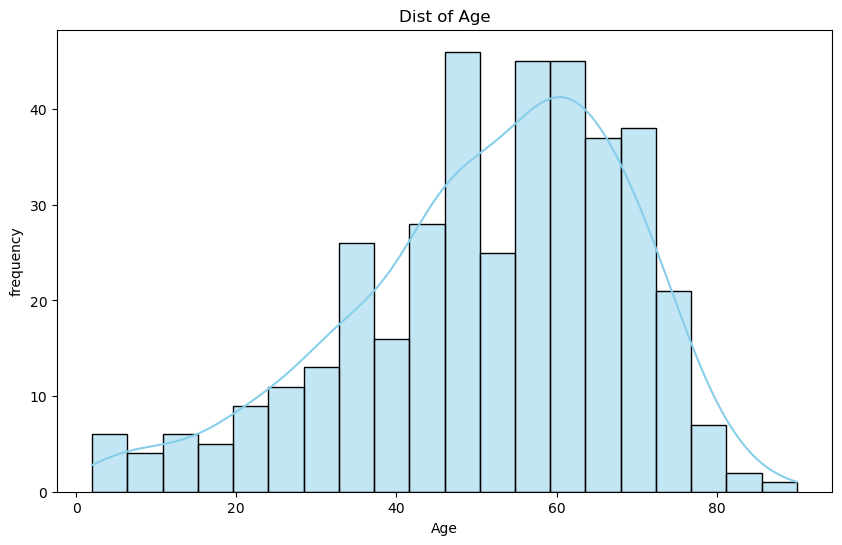

In [150]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(),kde=True,bins=20,color='skyblue')
plt.title('Dist of Age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

<Axes: xlabel='hypertension', ylabel='count'>

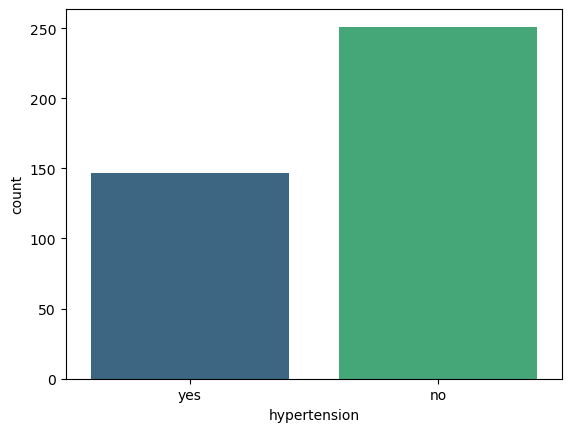

In [151]:
sns.countplot(x='hypertension',data=df,palette='viridis')

<Axes: xlabel='class', ylabel='blood_urea'>

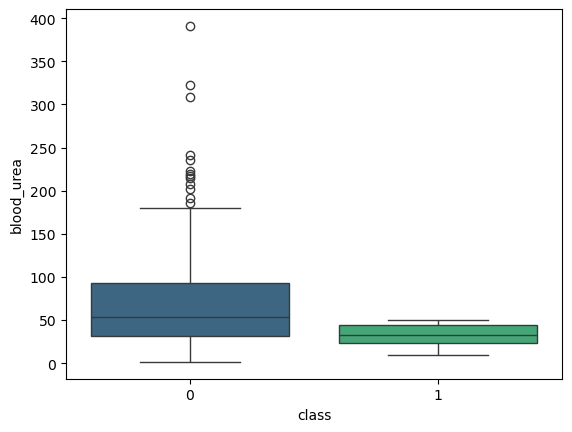

In [152]:
sns.boxplot(x='class',y='blood_urea',data=df,palette='viridis')

<Axes: xlabel='class', ylabel='serum_creatinine'>

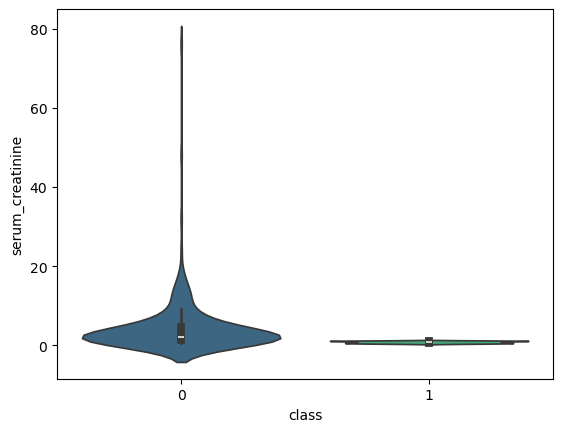

In [153]:
sns.violinplot(x='class',y='serum_creatinine',data=df,palette='viridis')

<Axes: xlabel='aanemia', ylabel='count'>

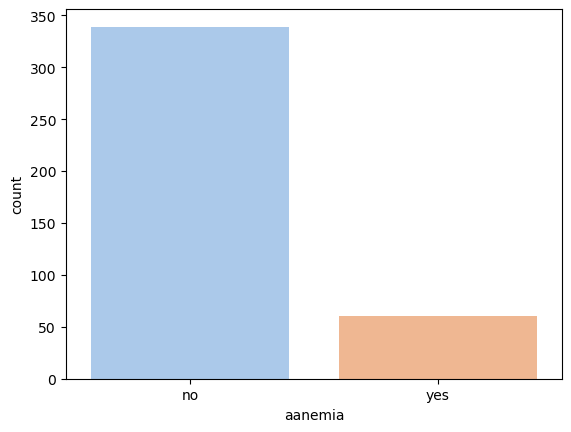

In [154]:
sns.countplot(x='aanemia',data=df,palette='pastel')

<Axes: ylabel='count'>

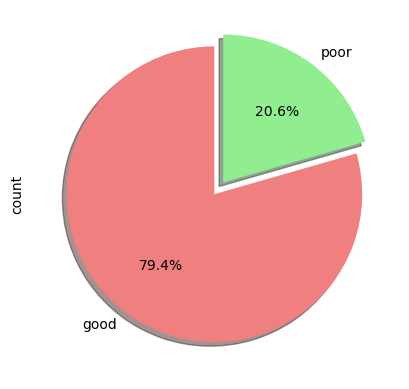

In [155]:
df['appetite'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['lightcoral','lightgreen'],shadow=True,startangle=90,explode=(0,0.1))

<Axes: xlabel='pus_cell_clumps', ylabel='count'>

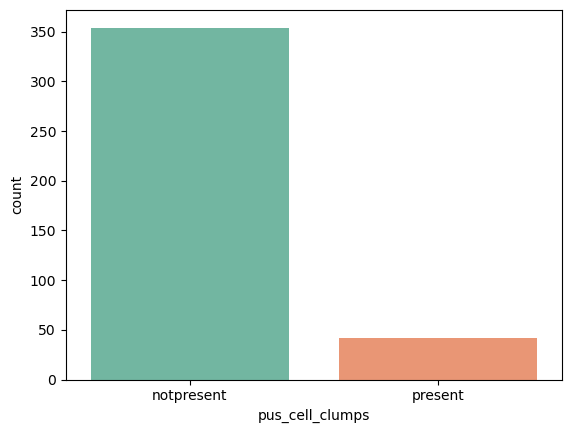

In [156]:
sns.countplot(x = 'pus_cell_clumps',data=df,palette='Set2')

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

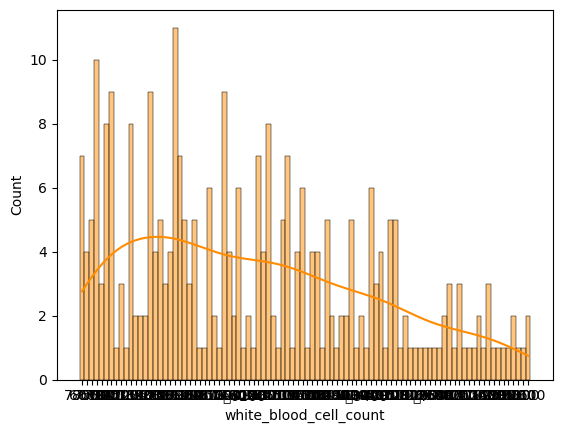

In [157]:
sns.histplot(df['white_blood_cell_count'].dropna(),bins=20,kde=True,color='darkorange')

In [158]:
df[df['white_blood_cell_count']=='?']

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class


In [159]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [160]:
df[df['white_blood_cell_count']=='\t6200']

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
76,48.0,80.0,1.005,4.0,0.0,abnormal,abnormal,notpresent,present,133.0,...,36.0,\t6200,4,no,yes,no,good,yes,no,0


In [161]:
df['white_blood_cell_count'] = df['white_blood_cell_count'].str.replace('\t',"").replace('?','').replace("",np.nan)

In [162]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '10500', '4200', '4700', '10900', '8100',
       '9500', '2200', '12800', '11200', '19100', '12300', '16700',
       '2600', '26400', '8800', '7400', '4900', '8000', '12000', '15700',
       '4100', '5700', '11500', '5400', '10800', '9900', '5200', '5900',
       '9300', '9700', '5100', '6600'], dtype=object)

In [163]:
df['white_blood_cell_count']

0      7800
1      6000
2      7500
3      6700
4      7300
       ... 
395    6700
396    7800
397    6600
398    7200
399    6800
Name: white_blood_cell_count, Length: 400, dtype: object

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

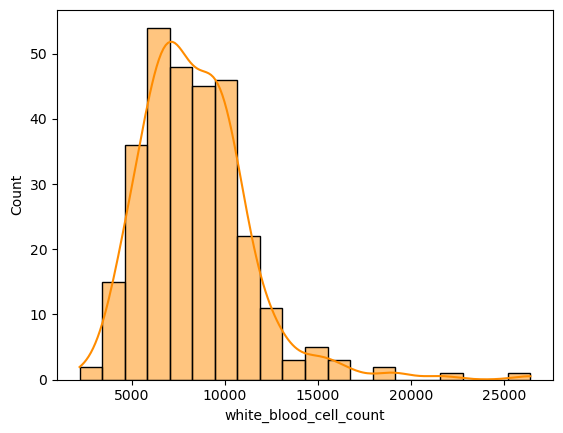

In [164]:
sns.histplot(df['white_blood_cell_count'].dropna().astype(int),bins=20,kde=True,color='darkorange')

<Axes: ylabel='count'>

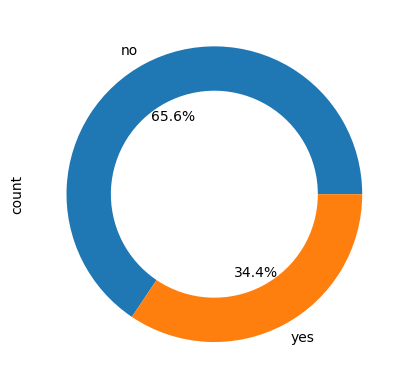

In [165]:
df['diabetes_mellitus'].value_counts().plot(kind='pie',autopct='%1.1f%%',wedgeprops = dict(width=0.3))

In [166]:
df['coronary_artery_disease'].isna().sum()

2

<Axes: xlabel='count', ylabel='coronary_artery_disease'>

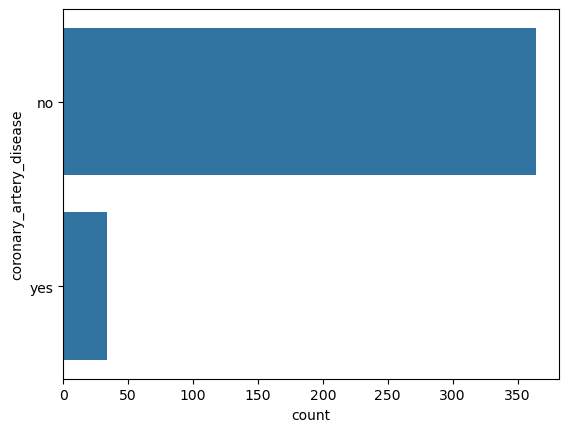

In [167]:
sns.countplot(df['coronary_artery_disease'])

<Axes: xlabel='count', ylabel='peda_edema'>

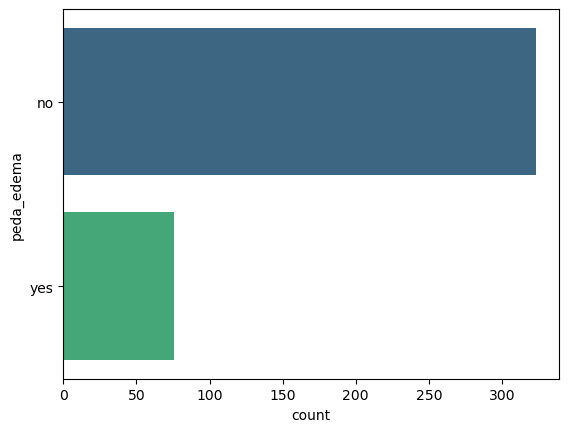

In [168]:
sns.countplot(df['peda_edema'],palette='viridis')

<Axes: xlabel='count', ylabel='bacteria'>

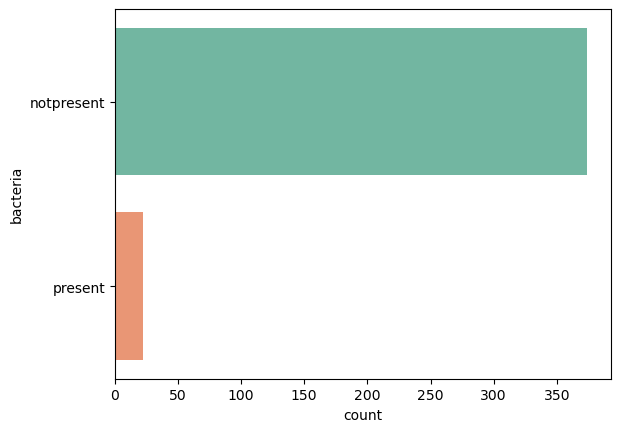

In [169]:
sns.countplot(df['bacteria'],palette='Set2')

<Axes: xlabel='age', ylabel='blood_pressure'>

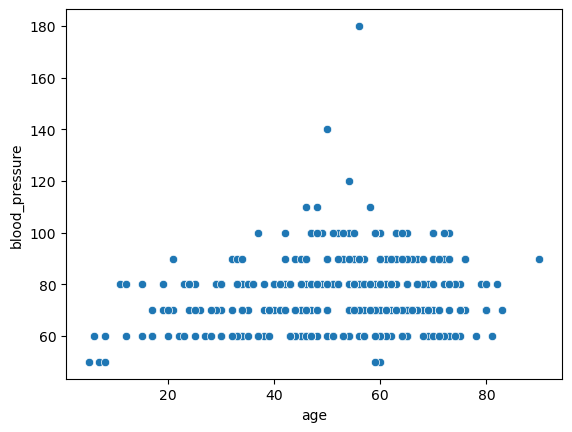

In [170]:
# bivoriate analysis
sns.scatterplot(x='age',y='blood_pressure',data=df)

<Axes: xlabel='age', ylabel='blood_pressure'>

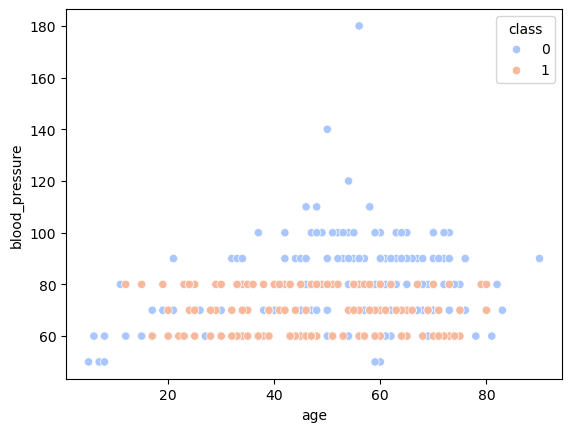

In [171]:
sns.scatterplot(x='age',y='blood_pressure',hue='class',data=df,palette='coolwarm')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

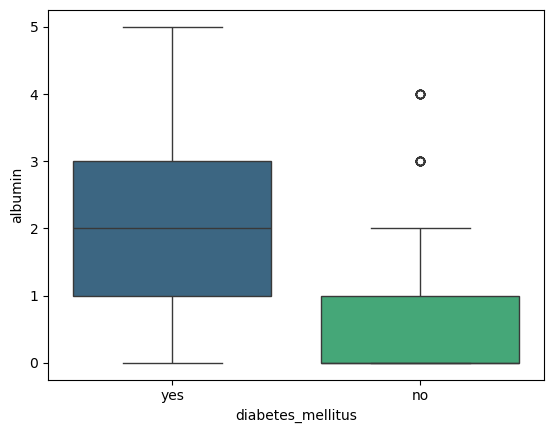

In [172]:
sns.boxplot(x='diabetes_mellitus',y='albumin',data=df,palette='viridis')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

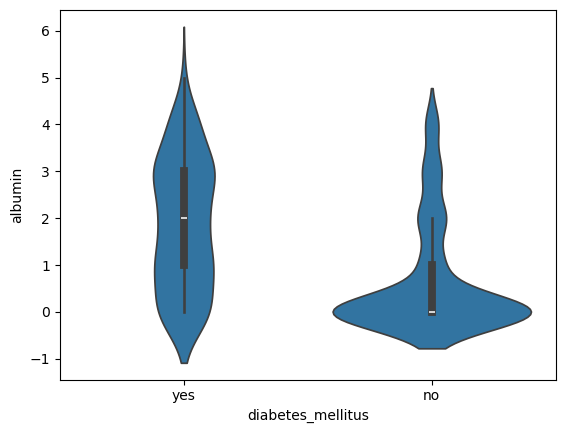

In [173]:
sns.violinplot(x='diabetes_mellitus',y='albumin',data=df)

<Axes: xlabel='diabetes_mellitus'>

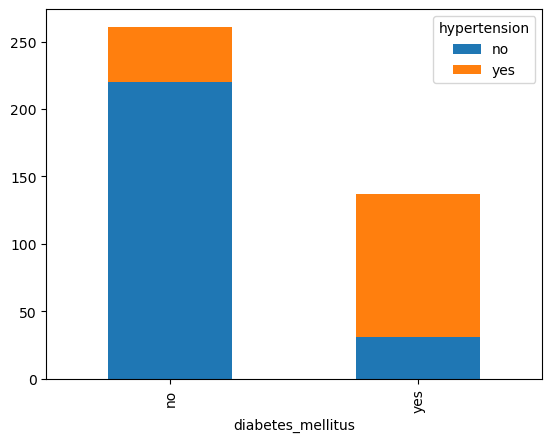

In [174]:
# stacked bar chart 
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'],df['hypertension'])

diabetes_hypertension.plot(kind='bar',stacked=True)

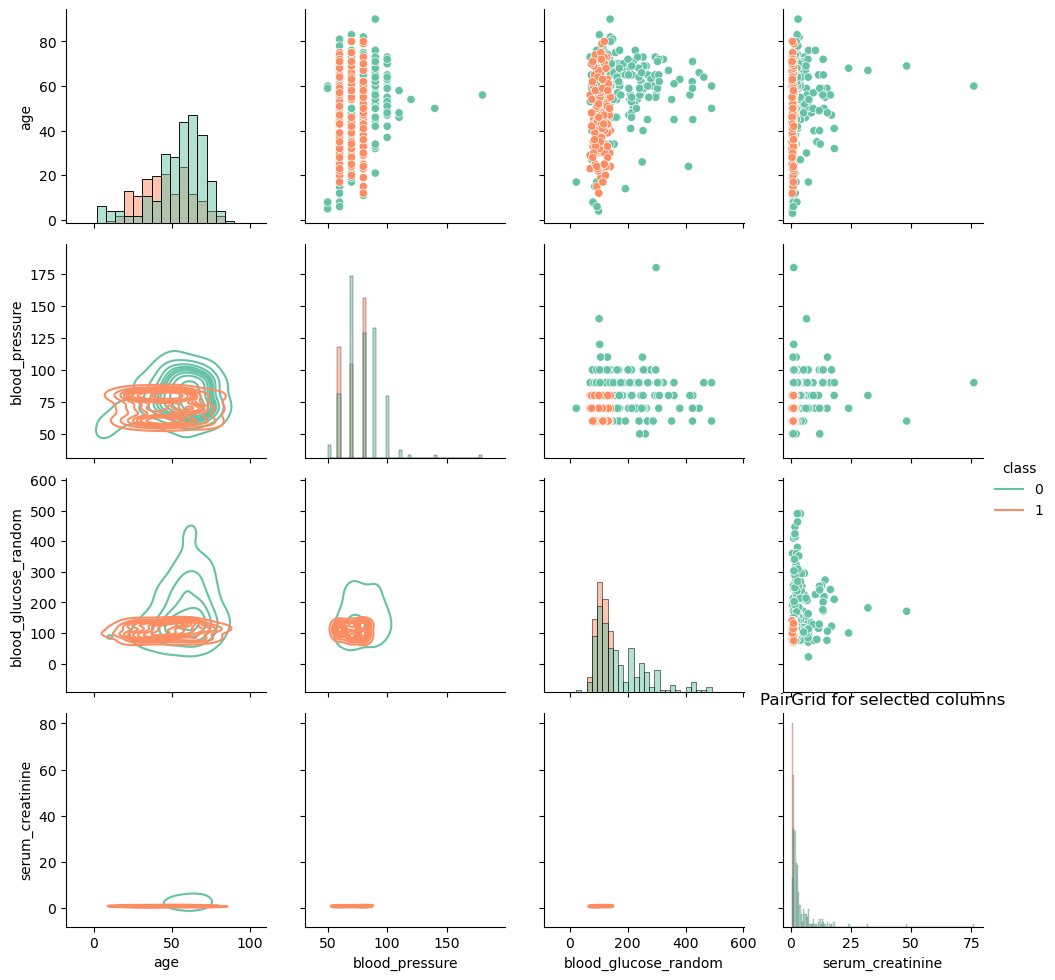

In [175]:
# multivariate analysis
cols = ['age','blood_pressure','blood_glucose_random','serum_creatinine','class']

g = sns.PairGrid(df[cols],hue='class',palette='Set2')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot,cmap='Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title("PairGrid for selected columns")
plt.show()

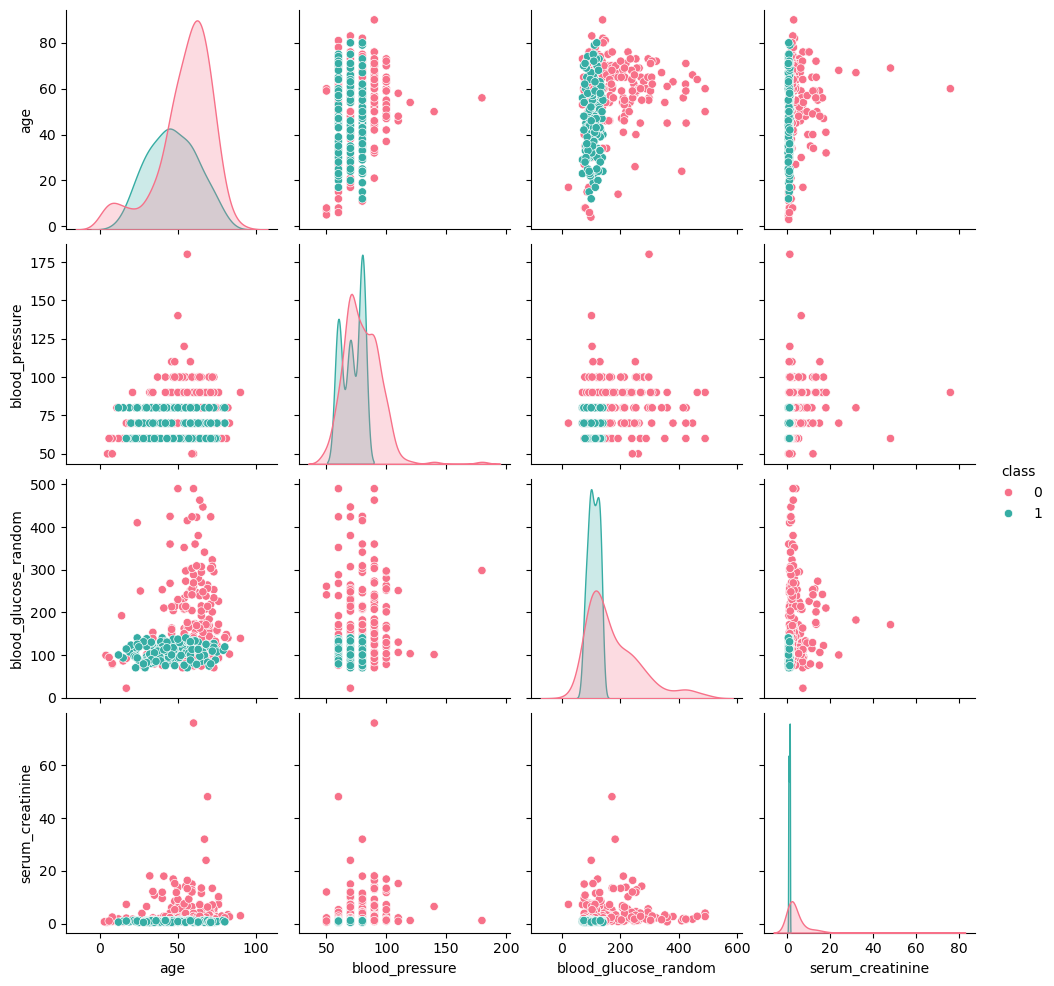

In [176]:
sns.pairplot(df[cols],hue='class',palette='husl')

<Axes: >

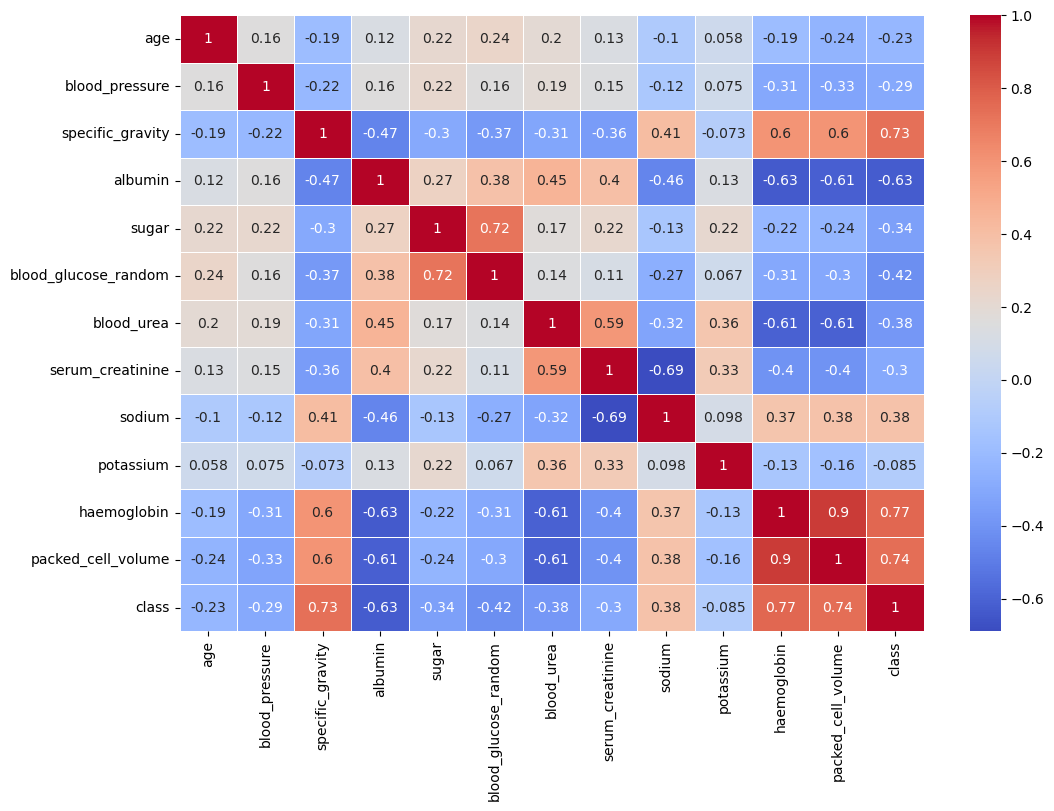

In [177]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=.5)

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

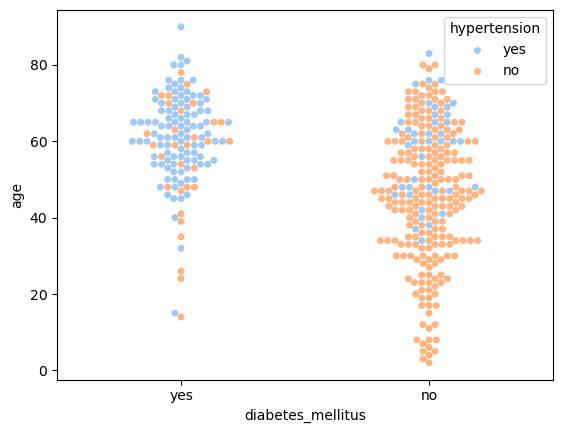

In [178]:
sns.swarmplot(x='diabetes_mellitus',y='age',hue='hypertension',data=df,palette='pastel')

In [179]:
fig = px.scatter(df,x='age',y='blood_pressure',color='class',hover_data=['serum_creatinine','haemoglobin'])
fig.show()

In [180]:
fig = px.scatter_3d(df,x='age',y='blood_pressure',z='serum_creatinine',color='class')
fig.show()

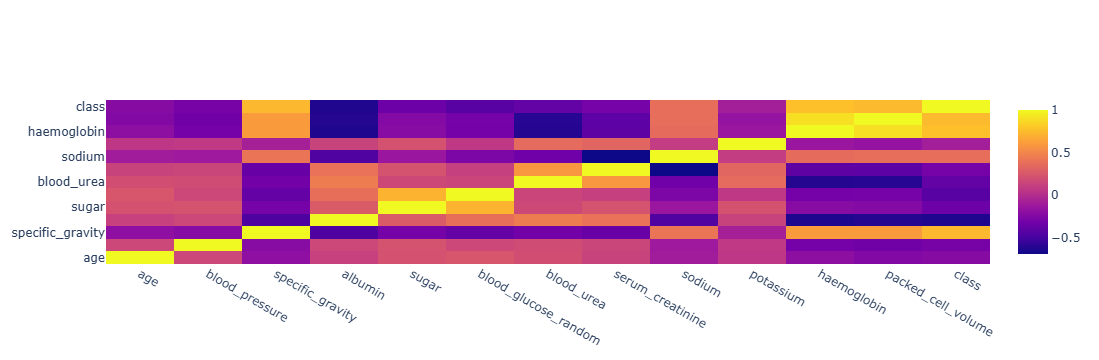

In [181]:
import plotly.graph_objects  as go

data_corr = df.corr(numeric_only=True)
fig = go.Figure(data=go.Heatmap(z=data_corr.values,
                               x = data_corr.columns,
                               y = data_corr.index))
fig.show()

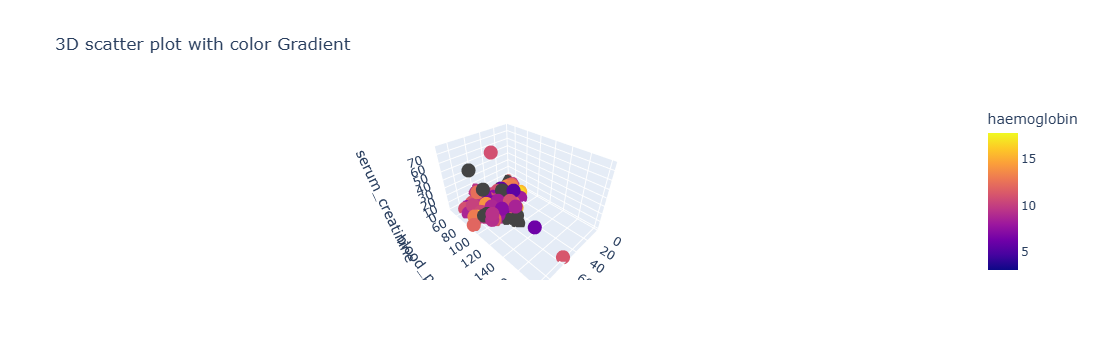

In [182]:
fig = px.scatter_3d(df,x='age',y='blood_pressure',z='serum_creatinine',color='haemoglobin',
                   title = '3D scatter plot with color Gradient')
fig.show()

In [192]:
df.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [201]:
cat = [i for i in df.columns if df[i].dtype=='object']
num = [i for i in df.columns if df[i].dtype!='object']

In [185]:
# replace with median
median_values = df[num].median()

In [186]:
df[num] = df[num].fillna(median_values)

In [187]:
df[num].isna().sum()

age                     0
blood_pressure          0
specific_gravity        0
albumin                 0
sugar                   0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
haemoglobin             0
packed_cell_volume      0
class                   0
dtype: int64

In [191]:
# replace with mode
cat_mode = df[cat].mode().iloc[0]
df[cat] = df[cat].fillna(cat_mode)

In [194]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                        int64
dtype: object

In [195]:
# encoding 
from sklearn.preprocessing import LabelEncoder

In [198]:
labelencoder = LabelEncoder()
for col in cat:
    df[col] = labelencoder.fit_transform(df[col])

In [199]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,69,34,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,53,34,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,67,34,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,59,19,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,65,27,0,0,0,0,0,0,0


In [203]:
num

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']